# 1.
The detection rate measures the proprotion of correctly detected suspicious claims under all suspicious claims in the dataset, i.e. $\frac{TP}{TP+FN}$. The hit rate measures the proportion of correctly detected suspicious claims under all instances that detected as suspicious claims by the model, i.e. $\frac{TP}{TP+FP}$. The detection rate is known as recall, and hit rate is known as precision. To tradeoff between detection rate and hit rate is that if the dataset is highly imbalanced, aka the number of suspicious instances is much larger or smaller than the number of non-suspicious instances, we should use detection rate or hit rate to measure whether the model can detect miniority classes. For detection rate, we can observe this metric to measure whether the model can detect all suspicious instances. For hit rate, we can observe this metric to measure whether the model has high false positive rate. In monetary terms, we should evaluate a model with hit rate $h$ to ensure all suspicious default clients can be detected, so that the bank can minimize the potential cost and risk. However, the model should not be too sensitive that even non-suspicious default clients are detected suspicious clients.

# 2.

In [1]:
import pandas as pd

df = pd.read_csv('Insurance_claims.csv')

In [2]:
df = df.drop(columns=['ThirdPartyVehicleNumber', 'InsurerNotes', 'DamageImportance', 'ConnectionBetweenParties', 'LossPostCode', 'PolicyHolderPostCode'])
columns = df.columns[df.isna().sum() > 0]
for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])
df

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,Employee,2/17/21,3/15/19,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
11526,16379,581104,788178.0,Employee,3/7/21,7/20/17,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
11527,16380,817231,40683.0,Employee,3/15/21,9/30/20,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
11528,16381,321534,468522.0,CivilServant,3/6/21,12/28/18,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


# 3. 

In [3]:
date_diff = pd.to_datetime(df['LossDate']) - pd.to_datetime(df['FirstPolicySubscriptionDate'])
date_diff.dt.days

0         198
1         552
2         696
3         711
4         354
         ... 
11525     705
11526    1326
11527     166
11528     799
11529    1473
Length: 11530, dtype: int64

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

all_hit_rates = []
all_detection_rates = []

all_thresholds = np.arange(1, date_diff.dt.days.max()+1)

for threshold in all_thresholds:
    y_pred = (date_diff.dt.days > threshold).astype(int)
    y_true = df['Fraud']
    
    hit_rate = precision_score(y_true, y_pred)
    detection_rate = recall_score(y_true, y_pred)
    
    all_hit_rates.append(hit_rate)
    all_detection_rates.append(detection_rate)

/Users/wubaobao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


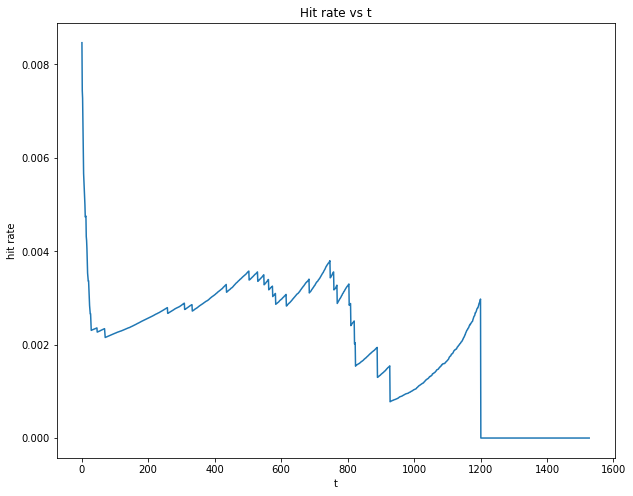

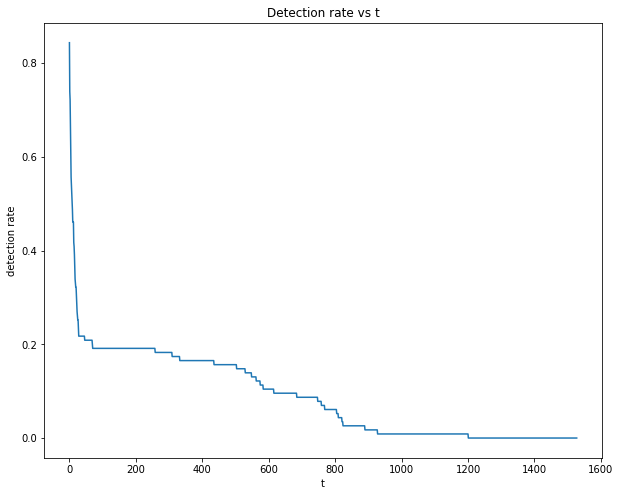

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(all_thresholds, all_hit_rates)
plt.xlabel('t')
plt.ylabel('hit rate')
plt.title('Hit rate vs t')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(all_thresholds, all_detection_rates)
plt.xlabel('t')
plt.ylabel('detection rate')
plt.title('Detection rate vs t')
plt.show()

To choose a larger detection rate and hit rate, we can choose a small number of value $t$.

# 4.

In [6]:
# convert categorical variable to numerical representation

categorical_columns = df[df.columns[df.dtypes == object]]

dummies = pd.get_dummies(df[['FirstPartyVehicleType', 'ClaimCause', 'ClaimInvolvedCovers', 'FirstPartyVehicleType']])
df = pd.concat((df, dummies), axis=1)

df['LossYear'] = pd.to_datetime(df['LossDate']).dt.year
df['LossMonth'] = pd.to_datetime(df['LossDate']).dt.month
df['LossDay'] = pd.to_datetime(df['LossDate']).dt.day

df['FirstPolicySubscriptionYear'] = pd.to_datetime(df['FirstPolicySubscriptionDate']).dt.year
df['FirstPolicySubscriptionMonth'] = pd.to_datetime(df['FirstPolicySubscriptionDate']).dt.month
df['FirstPolicySubscriptionDay'] = pd.to_datetime(df['FirstPolicySubscriptionDate']).dt.day
df = df.drop(columns=categorical_columns)
df

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,...,FirstPartyVehicleType_Car,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar,LossYear,LossMonth,LossDay,FirstPolicySubscriptionYear,FirstPolicySubscriptionMonth,FirstPolicySubscriptionDay
0,4842,531112,715507.0,1,1,104.0,0.25,1,4624.73,8.0,...,1,0,0,0,2019,1,2,2018,6,18
1,4844,87170,71164.0,0,3,230.0,0.50,1,1606.81,11.0,...,1,0,0,0,2019,1,2,2017,6,29
2,4848,98706,442609.0,0,9,93.0,0.25,0,998.20,18.0,...,1,0,0,0,2019,1,2,2017,2,5
3,4849,38240,24604.0,0,2,56.0,0.25,0,2506.92,11.0,...,1,0,0,0,2019,1,2,2017,1,21
4,4850,11339,2933.0,0,4,110.0,0.25,0,12.00,12.0,...,1,0,0,0,2019,1,2,2018,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,0,1,85.0,0.50,1,1010.23,0.0,...,1,0,0,0,2021,2,17,2019,3,15
11526,16379,581104,788178.0,0,3,119.0,0.50,1,154.35,0.0,...,1,0,0,0,2021,3,7,2017,7,20
11527,16380,817231,40683.0,0,4,139.0,0.50,1,420.25,0.0,...,1,0,0,0,2021,3,15,2020,9,30
11528,16381,321534,468522.0,0,6,105.0,0.50,1,96.40,0.0,...,1,0,0,0,2021,3,6,2018,12,28


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df[[column for column in df.columns if column != 'Fraud']], df['Fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

hit_rate = precision_score(y_test, y_pred)
detection_rate = recall_score(y_test, y_pred)

print(f'hit rate = {hit_rate}')
print(f'detection rate = {detection_rate}')

hit rate = 0.13333333333333333
detection rate = 0.17391304347826086


# 5.

In [99]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential, layers

model = Sequential([layers.Dense(units=500, activation='relu'),
                    layers.Dense(units=1, activation='sigmoid')])
model.build(input_shape=(None, X_train.shape[1]))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 500)               61000     
                                                                 
 dense_52 (Dense)            (None, 1)                 501       
                                                                 
Total params: 61,501
Trainable params: 61,501
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
289/289 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9924 - val_loss: 492.1566 - val_accuracy: 0.9254
Epoch 2/5
289/289 [==============================] - 0s 2ms/step - loss: 6.0351e-04 - accuracy: 1.0000 - val_loss: 504.8597 - val_accuracy: 0.9237
Epoch 3/5
289/289 [==============================] - 0s 1ms/step - loss: 2.6789e-04 - accuracy: 1.0000 - val_loss: 514.1269 - val_accuracy: 0.9228
Epoch 4/5
289/289 [==============================] - 0s 1ms/step - loss: 1.5040e-04 - accuracy: 1.0000 - val_loss: 521.3917 - val_accuracy: 0.9228
Epoch 5/5
289/289 [==============================] - 0s 1ms/step - loss: 9.5481e-05 - accuracy: 1.0000 - val_loss: 527.5080 - val_accuracy: 0.9211


In [106]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

hit_rate = precision_score(y_test, y_pred)
detection_rate = recall_score(y_test, y_pred)

print(f'hit rate = {hit_rate}')
print(f'detection rate = {detection_rate}')

hit rate = 0.17346053772766695
detection rate = 0.2168256721595837


In [107]:
model.save('Part5.h5')

# 6.

In [85]:
import numpy as np

non_fraud_idx = np.arange(len(X))[y == 0]
fraud_idx = np.arange(len(X))[y == 1]
np.random.shuffle(non_fraud_idx)

train_indices = non_fraud_idx[:int(0.8*len(X))]
val_test_indices = np.concatenate((non_fraud_idx[int(0.8*len(X)):], fraud_idx))
X_train, y_train = X[train_indices], y[train_indices]

X_val_test, y_val_test = X[val_test_indices], y[val_test_indices]
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test)

In [86]:
model_ae = Sequential([layers.Dense(units=100, activation='relu'),
                       layers.Dense(units=50, activation='relu'), 
                       layers.Dense(units=100, activation='relu'),
                       layers.Dense(units=X_train.shape[1])])
model_ae.build(input_shape=(None, X_train.shape[1]))
model_ae.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               12200     
                                                                 
 dense_43 (Dense)            (None, 50)                5050      
                                                                 
 dense_44 (Dense)            (None, 100)               5100      
                                                                 
 dense_45 (Dense)            (None, 121)               12221     
                                                                 
Total params: 34,571
Trainable params: 34,571
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_ae.compile(loss='mse', optimizer='adam', metrics='mse')
model_ae.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=10)

Epoch 1/10
289/289 [==============================] - 1s 2ms/step - loss: 0.8147 - mse: 0.8147 - val_loss: 0.5683 - val_mse: 0.5683
Epoch 2/10
289/289 [==============================] - 0s 1ms/step - loss: 0.5622 - mse: 0.5622 - val_loss: 0.4585 - val_mse: 0.4585
Epoch 3/10
289/289 [==============================] - 0s 1ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 0.3800 - val_mse: 0.3800
Epoch 4/10
289/289 [==============================] - 0s 1ms/step - loss: 0.3723 - mse: 0.3723 - val_loss: 0.3423 - val_mse: 0.3423
Epoch 5/10
289/289 [==============================] - 0s 1ms/step - loss: 0.3244 - mse: 0.3244 - val_loss: 0.3260 - val_mse: 0.3260
Epoch 6/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2888 - mse: 0.2888 - val_loss: 0.3030 - val_mse: 0.3030
Epoch 7/10
289/289 [==============================] - 0s 1ms/step - loss: 0.2598 - mse: 0.2598 - val_loss: 0.2873 - val_mse: 0.2873
Epoch 8/10
289/289 [==============================] - 0s 2ms/step - loss: 0.

In [88]:
from sklearn.metrics import mean_squared_error

X_pred = model_ae.predict(X_val)
errors = np.mean(np.square(X_pred, X_val), axis=1)

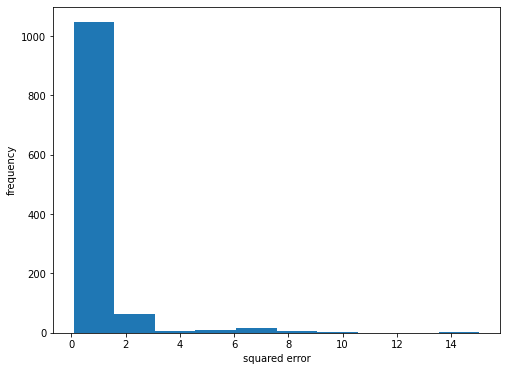

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(errors)
plt.xlabel('squared error')
plt.ylabel('frequency')
plt.show()

The threshold we set is 4. If the error is larger than 4, we predict it is a fraudulent claim. Otherwise, we predict it is non-fraudulent.

In [91]:
X_pred = model_ae.predict(X_test)
test_errors = np.mean(np.square(X_pred, X_test), axis=1)
y_pred_test = (test_errors > 4).astype(int)

hit_rate = precision_score(y_test, y_pred_test)
detection_rate = recall_score(y_test, y_pred_test)

print(f'hit rate = {hit_rate}')
print(f'detection rate = {detection_rate}')

hit rate = 0.07395498392282958
detection rate = 0.178734929833234


In [92]:
model_ae.save('Part6.h5')

# 7.
For hit rate, decision tree classifier is most promising compared with other approaches, which indicates decision tree can avoid those non-fraudulent clients predicting to fraudulent ones. For detection rate, the model that can achieve the highest value is autoencoder. It indicates autoencoder can extract information from the non-fraudulent instances, and the predicted values of fraudulent instances and the true instances can be high, so the we can set a threshold to distinguish them based on the errors.

# 8.
We can assign a weight to the loss function, where the minor instances are assigned to larger weights, and the major instances are assigned to the smaller weights, based on the proportion of the each label. In our case, the ratio of non-fraudulent and fraudulent is about 10: 1. Thus, we can assign fraudulent instances to 10, and non-fraudulent instances to 1. Another approach is to oversample randomly. The idea is that we randomly sample minor instances with replacement, until the number of instances is equal to the major instances. In our dataset, we have 11415 non-fraudulent instaces and 115 fraudulent instances. Thus, we can sample 11300 minor instances, so that the number of non-fraudulent instaces and the number of fraudulent instaces are both equal to 11415.